## Problem Statement 

A key challenge for e-commerce businesses is to analyze the trend in the market to increase their sales. The trend can be easily observed if the companies can group the customers; based on their activity on the e-commerce site.  This grouping can be done by applying different criteria like previous orders, mostly searched brands and so on. The machine learning clustering algorithms can provide an analytical method to cluster customers with similar interests.

##  Data Definition 

The e-commerce dataset contains information about the various brands searched by 30000 customers on an online shopping site  

Here's a brief version of what you'll find in the data

**Cust_ID**: Unique numbering for customers

**Gender**: Gender of the customer

**Orders**: Number of orders placed by each customer in the past

Remaining 35 features like 'Nike', 'Knorr', 'Acer', 'Oreo', 'Puma', 'Zara', 'Ralph Lauren', 'OnePlus', 'Hollister', 'Sony', contains the number of times customers have searched these brands

## Table of Content

1. **[Import Libraries](#import_lib)**
2. **[Set Options](#setting_opt)**
3. **[Read Data](#load_data)**
4. **[Exploratory Data Analysis](#EDA)**
   - 4.1 - [Understand the Dataset](#Understanding_Variables)
   - 4.2 - [Data Type](#change_datatype)
   - 4.3 - [Distribution of Variables](#dis)
   - 4.4 - [Summary Statistics ](#stat)
   - 4.5 - [Missing Values](#missing_values)
5. **[K-means Clustering](#modeling)**
    - 5.1 - [Prepare the Data](#preparation_of_data)
    - 5.2 - [Build a Model with Multiple K](#model)
6. **[Retrieve the Clusters](#retrieve_clusters)**
    - 6.1 - [Analysis of Cluster_1](#cluster_1)
    - 6.2 - [Analysis of Cluster_2](#cluster_2)
    - 6.3 - [Analysis of Cluster_3](#cluster_3)
    - 6.4 - [Analysis of Cluster_4](#cluster_4)
7. **[Conclusion](#conclusion)**

<a id='import_lib'></a>
## 1. Import Libraries

In [0]:
# suppress display of warnings
import warnings
warnings.filterwarnings("ignore")

# 'os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# import 'is_string_dtype' and 'is_numeric_dtype' to check thetype as string or numeric 
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

<a id='setting_opt'></a>
## 2. Set Options

In [0]:
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

# use below code to convert the 'exponential' values to float
np.set_printoptions(suppress=True)

# the path for reading the data file
# Note: Set your path accordingly
#os.chdir("F:\\DS\\Datasets\\")

<a id='load_data'></a>
## 3. Read Data

In [3]:
# read excel data file using pandas
df_customers = pd.read_excel('cust_data.xlsx')

# head() to display top five rows
df_customers.head()

# Note: To display more rows, example 10, use head(10)

,Cust_ID,Gender,Orders,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's
0,1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
2,3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


In [4]:
# the parameter 'index_col' changes the index to the specified column
df_customers = pd.read_excel('cust_data.xlsx', index_col=0)

# head() to display top five rows
df_customers.head()

,Gender,Orders,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,M,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,F,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
3,M,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,F,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,NaN,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


<a id='EDA'></a>
## 4. Exploratory Data Analysis

<a id='Understanding_Variables'></a>
### 4.1 Understand the Dataset

#### Dimensions of the data

In [5]:
# 'shape' function gives the total number of rows and columns in the data
df_customers.shape

(30000, 37)

<a id='change_datatype'></a>
### 4.2 Data Type 

The main data types stored in Pandas data frames are the object, float, int64, bool, and datetime64. To understand each attribute of our data, it is always good for us to know the data type of each column

**1. Check for the data type**

In [6]:
# 'dtypes' gives the datatype for each column
df_customers.dtypes

Gender            object
Orders             int64
Nike               int64
Adidas             int64
Sony               int64
Acer               int64
Oreo               int64
Knorr              int64
Levis              int64
Under Armour       int64
Reebok             int64
Puma               int64
Zara               int64
Baskin-Robbins     int64
Prada              int64
Toshiba            int64
Nestle             int64
Umbro              int64
Bosch              int64
Dannon             int64
Pringles           int64
Nokia              int64
Samsung            int64
Dell               int64
HP                 int64
Ralph Lauren       int64
OnePlus            int64
Lenovo             int64
Armani             int64
Gucci              int64
Diesel             int64
Hollister          int64
Abercrombie        int64
Bertolli           int64
Apple              int64
Pillsbury          int64
Kellogg's          int64
dtype: object

**2. Change the incorrect data type**

In [0]:
# select the columns for which we change the data type
cols = df_customers.columns.drop(['Gender', 'Orders'])

# use 'for loop' to change the multiple columns
# .astype() to change the data type
for col in  cols:
    df_customers[col] = df_customers[col].astype('object')

**3. Recheck the data type after the conversion**

In [8]:
# recheck the data types of all independent variables
df_customers.dtypes

Gender            object
Orders             int64
Nike              object
Adidas            object
Sony              object
Acer              object
Oreo              object
Knorr             object
Levis             object
Under Armour      object
Reebok            object
Puma              object
Zara              object
Baskin-Robbins    object
Prada             object
Toshiba           object
Nestle            object
Umbro             object
Bosch             object
Dannon            object
Pringles          object
Nokia             object
Samsung           object
Dell              object
HP                object
Ralph Lauren      object
OnePlus           object
Lenovo            object
Armani            object
Gucci             object
Diesel            object
Hollister         object
Abercrombie       object
Bertolli          object
Apple             object
Pillsbury         object
Kellogg's         object
dtype: object

<a id='dis'></a>
### 4.3 Distribution of Variables

**1. Distribution of numeric variable**

####  Number of orders placed by the customer

Check the distribution for the number of orders placed by the customers in the past

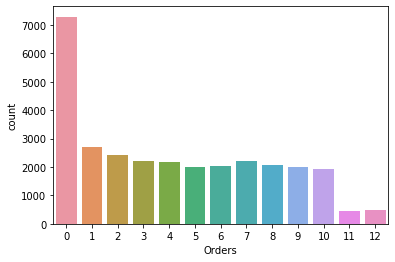

In [9]:
# use 'countplot' to plot barplot for orders
sns.countplot(data = df_customers, x = 'Orders')
plt.show()

**2. Distribution of categoric variable**

#### Gender of the customer 

Plot the barplot to get the count for the gender 

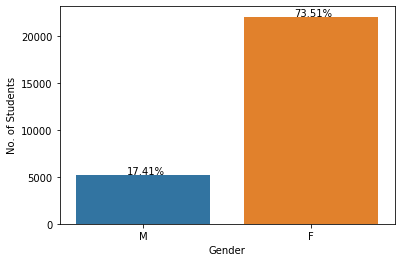

In [10]:
# use 'countplot' to gender-wise calculate the number of customers 
sns.countplot(data= df_customers, x = 'Gender')

# give a name to the y-axis
plt.ylabel('No. of Students')            

# use below code to print the values in the graph
# 'x' and 'y' gives the position of the text
# 's' is the text 
plt.text(x = -0.1, y = df_customers.Gender.value_counts()[1] + 20, s = str(round((df_customers.Gender.value_counts()[1])*100/len(df_customers.Gender),2)) + '%')
plt.text(x = 0.9, y = df_customers.Gender.value_counts()[0] + 20, s = str(round((df_customers.Gender.value_counts()[0])*100/len(df_customers.Gender),2)) + '%')
plt.show()

<a id='stat'></a>
### 4.4  Summary Statistics

**1. For numerical variables, use .describe()**

In [11]:
# describe() gives the statistical summary of the variables
df_customers.describe()

,Orders
count,30000.000000
mean,4.169800
std,3.590311
min,0.000000
25%,1.000000
50%,4.000000
75%,7.000000
max,12.000000


**2. For categorical variables, use .describe(include=object)**

In [12]:
# summary of the categorical variables
df_customers.describe(include = object)

# Note: If we pass 'include=object' to the .describe() function returns descriptive statistics for categorical variables only

,Gender,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's
count,27276,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,16,13,20,17,13,13,10,16,15,10,16,25,14,10,11,25,11,27,17,29,16,19,9,21,9,14,12,11,9,10,9,15,13,9,12
top,F,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
freq,22054,25188,25050,26900,27597,27588,26917,28164,27985,28410,26700,23756,26803,26931,27033,28051,25586,29077,16480,24960,22031,25666,27653,29384,23120,27540,28062,24591,22215,26480,28324,28647,25993,27299,28079,28597


<a id='missing_values'></a>
### 4.5 Missing Values

In [13]:
# sorting variables based on null values
# 'ascending = False' sorts values in the descending order
Total = df_customers.isnull().sum().sort_values(ascending=False)          

# percentage of missing values
Percent = (df_customers.isnull().sum()/df_customers.isnull().count()*100).sort_values(ascending=False)   

# create a dataframe using 'concat' function 
# 'keys' is the list of column names
# 'axis = 1' concats along the columns
missing_data = pd.concat([Total, Percent], axis=1, keys=['Total', 'Percent'])    
missing_data

,Total,Percent
Gender,2724,9.08
Umbro,0,0.00
Toshiba,0,0.00
Prada,0,0.00
Baskin-Robbins,0,0.00
Zara,0,0.00
Puma,0,0.00
Reebok,0,0.00
Under Armour,0,0.00
Levis,0,0.00


We plot a heatmap for visualization of missing values

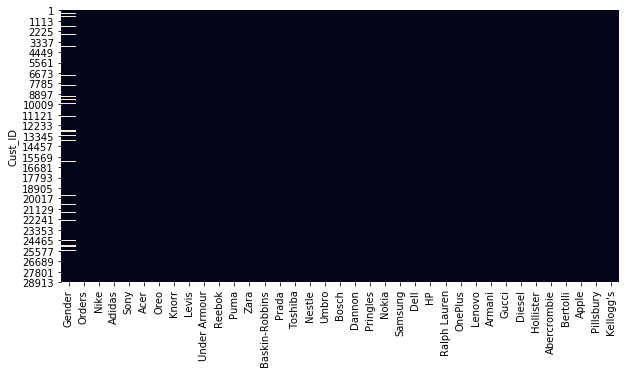

In [14]:
# set the figure size
plt.figure(figsize=(10, 5))

# plot heatmap to check null values
# 'cbar = False' does not show the color axis 
sns.heatmap(df_customers.isnull(), cbar=False)
plt.show()

The horizontal lines in the heatmap correspond to the missing values

#### Replace missing values in 'Gender'

'Gender' is a categorical variable with categories, 'M' and 'F'. We have 2724 customers whose gender is not known to us. To deal with this, we perform dummy encoding for the variable  

In [15]:
# create dummies against 'gender'
df_customers = pd.get_dummies(df_customers,columns=['Gender'])     

# head() to display top five rows
df_customers.head()

,Orders,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's,Gender_F,Gender_M
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
5,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0


In [16]:
# check the dimensions after dummy encoding
df_customers.shape

(30000, 38)

In [17]:
# recheck the null values
df_customers.isnull().sum()

Orders            0
Nike              0
Adidas            0
Sony              0
Acer              0
Oreo              0
Knorr             0
Levis             0
Under Armour      0
Reebok            0
Puma              0
Zara              0
Baskin-Robbins    0
Prada             0
Toshiba           0
Nestle            0
Umbro             0
Bosch             0
Dannon            0
Pringles          0
Nokia             0
Samsung           0
Dell              0
HP                0
Ralph Lauren      0
OnePlus           0
Lenovo            0
Armani            0
Gucci             0
Diesel            0
Hollister         0
Abercrombie       0
Bertolli          0
Apple             0
Pillsbury         0
Kellogg's         0
Gender_F          0
Gender_M          0
dtype: int64

<a id='modeling'></a>
## 5. K-means Clustering

Centroid-based clustering algorithms cluster the data into non-hierarchical clusters. Such algorithms are efficient but sensitive to initial conditions and outliers. K-means is the most widely-used centroid-based clustering algorithm

<a id='preparation_of_data'></a>
### 5.1 Prepare the Data

Feature scaling is a technique to standardize the independent features present in the data in a fixed range. If feature scaling is not done, then a machine learning algorithm tends to weigh greater values, higher and consider smaller values as the lower values, regardless of the unit of the values.

The two most discuss scaling methods are normalization and standardization. 

Normalization: It should be used if there are any predefined assumptions of the model. In this approach, the data is scaled to a fixed range - usually 0 to 1

Standardization: It is used when we are dealing with multiple variables together. In this technique, the features will be rescaled so that they’ll have the properties of a standard normal distribution with (mean = 0 and sd = 1)    

In [18]:
# 'features' contain only the brand names
features = df_customers.drop(['Orders', 'Gender_F', 'Gender_M'], axis=1)

# head() to display top five rows
features.head()

,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1


**Scale the data**

In [0]:
# instantiate and fit 'StandardScaler' function
scale = StandardScaler().fit(features)       

# scale the 'features' data
features = scale.transform(features)                

In [20]:
# create a dataframe of the scaled features 
features_scaled = pd.DataFrame( features, columns= df_customers.columns[1:36])

# head() to display top five rows
features_scaled.head()

,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's
0,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,3.446412,-0.177332,-0.297352,-0.406368,-0.186831,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.058152,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
1,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.186831,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,0.986574,2.419713,0.393100,-0.304147,-0.198739,-0.12087,5.070692,8.097945,-0.058152,1.019864,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
2,-0.332312,1.059984,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,-0.186831,-0.267321,-0.266358,-0.205420,1.518804,-0.141891,0.194272,-0.342359,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.058152,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,1.978708,-0.220486,-0.182775
3,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,0.831805,-0.186831,-0.267321,-0.266358,-0.205420,-0.268269,-0.141891,-0.598029,1.038677,-0.349766,-0.304147,-0.198739,-0.12087,-0.389526,-0.253322,-0.058152,-0.379382,-0.487923,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,-0.220486,-0.182775
4,-0.332312,-0.357739,-0.242985,-0.21801,-0.223835,-0.265801,-0.20727,-0.203353,-0.177332,-0.297352,-0.406368,0.703124,-0.267321,-0.266358,9.475052,0.625267,-0.141891,1.778876,-0.342359,0.393100,-0.304147,-0.198739,-0.12087,0.520510,-0.253322,-0.058152,-0.379382,2.149024,-0.311382,-0.202593,-0.191062,-0.299706,-0.260578,2.284083,2.395151


We do not know how many clusters give the most useful results. So, we create the clusters varying K, from 3 to 8 and then decide the optimum number of clusters (K) with the help of the silhouette score

In [21]:
# create a list for different values of K
n_clusters = [3, 4, 5, 6,7,8]

# use 'for' loop to build the clusters
# 'random_state' creates the sample in the same order 
# fit and predict on the scaled data
# 'silhouette_score' function computes the silhouette score for each K
for K in n_clusters :
    cluster = KMeans (n_clusters= K, random_state= 10)
    predict = cluster.fit_predict(features_scaled)
    
    score = silhouette_score(features_scaled, predict, random_state= 10)
    print ("For n_clusters = {}, silhouette score is {})".format(K, score))

For n_clusters = 3, silhouette score is 0.2980099812702593)
For n_clusters = 4, silhouette score is 0.2987361180497344)
For n_clusters = 5, silhouette score is 0.2690156559208289)
For n_clusters = 6, silhouette score is 0.2838819415692739)
For n_clusters = 7, silhouette score is 0.2634802887552633)
For n_clusters = 8, silhouette score is 0.2065121793156038)


In [22]:
# building a K-Means model for K = 4
model = KMeans(n_clusters= 4, random_state= 10)

# fit the model
model.fit(features_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=10, tol=0.0001, verbose=0)

Now, explore these 4 clusters to gain some insights into the clusters

<a id='retrieve_clusters'></a>
## 6. Retrieve the Clusters

In [23]:
# add a column 'cluster' in the data giving cluster number corresponding to each observation
df_customers['cluster'] = model.labels_

# head() to display top five rows
df_customers.head()

,Orders,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's,Gender_F,Gender_M,cluster
Cust_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,7,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,2,1,0,0,0,6,4,0,1,0,0,0,0,0,0,0,0,1,0,2
3,7,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
5,10,0,0,0,0,0,0,0,0,0,0,0,1,0,0,5,1,0,3,0,1,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0,1


We have added a column 'cluster' in the dataframe describing the cluster number for each observation

#### Check the size of each cluster

In [24]:
# 'return_counts = True' gives the number observation in each cluster
np.unique(model.labels_, return_counts=True)                

(array([0, 1, 2, 3], dtype=int32), array([22902,  1138,  5261,   699]))

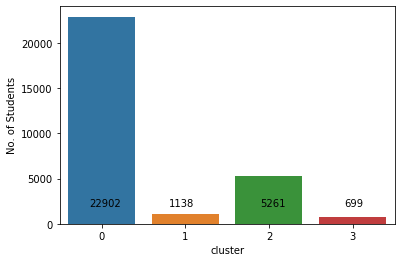

In [25]:
# use 'seaborn' library to plot a barplot for cluster size
sns.countplot(data= df_customers, x = 'cluster')

# give a name to the y-axis
plt.ylabel('No. of Students')         

# add values in the graph
plt.text(x = -0.15, y =2000, s = np.unique(model.labels_, return_counts=True)[1][0])
plt.text(x = 0.8, y =2000, s = np.unique(model.labels_, return_counts=True)[1][1])
plt.text(x = 1.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][2])
plt.text(x = 2.9, y =2000, s = np.unique(model.labels_, return_counts=True)[1][3])

plt.show()

#### Cluster Centers

The cluster centers can give information about the variables belonging to the clusters

In [0]:
# form a dataframe containing cluster centers
centers = pd.DataFrame(model.cluster_centers_, columns=  df_customers.columns[1:36])      

In [27]:
# head() to display top five rows
centers.head()

,Nike,Adidas,Sony,Acer,Oreo,Knorr,Levis,Under Armour,Reebok,Puma,Zara,Baskin-Robbins,Prada,Toshiba,Nestle,Umbro,Bosch,Dannon,Pringles,Nokia,Samsung,Dell,HP,Ralph Lauren,OnePlus,Lenovo,Armani,Gucci,Diesel,Hollister,Abercrombie,Bertolli,Apple,Pillsbury,Kellogg's
0,-0.157658,-0.158160,-0.087075,-0.112898,-0.111992,-0.083172,-0.113777,-0.084583,-0.027554,-0.123219,-0.160344,-0.091150,-0.074060,-0.054319,-0.124457,-0.120640,-0.114187,-0.114051,-0.099657,-0.086525,-0.119822,-0.053236,-0.015733,-0.185464,-0.094017,-0.025004,-0.159378,-0.182779,-0.141317,-0.146914,-0.140440,-0.079033,-0.068310,-0.080984,-0.084312
1,0.366513,0.384759,0.132462,0.170282,0.095457,0.252250,0.206623,0.271309,0.095422,0.827006,0.491253,1.972365,0.509789,0.200015,2.839931,0.381076,-0.022567,1.190568,1.192800,0.398975,0.144402,0.110053,0.028647,2.608476,0.486037,0.340882,0.579680,0.282538,1.194718,0.299392,0.400467,1.576167,0.880710,1.808699,2.123313
2,0.623406,0.605039,0.365674,0.461500,0.479021,0.306823,0.466750,0.327023,0.098363,0.375492,0.599205,-0.021849,0.214980,0.207562,-0.061705,-0.057045,-0.112675,0.190201,0.161270,0.281967,0.482286,0.204153,0.062645,0.255675,0.299429,0.038239,0.586029,0.747487,0.363420,0.599714,0.547233,0.008067,0.105533,-0.026946,-0.079246
3,-0.115435,0.009368,-0.110445,-0.045956,-0.085513,0.008987,-0.115762,-0.127642,0.008363,-0.130391,-0.048556,-0.059513,-0.018613,-0.105515,-0.080778,3.762232,4.626024,0.369962,0.112059,0.066834,0.066883,0.031078,-0.001865,-0.090086,0.039391,-0.022917,-0.125156,-0.088043,-0.045166,-0.180202,-0.162457,-0.036469,0.011724,-0.087912,-0.097950


Now, extract the variables in each of the clusters and try to name each of the cluster based on the variables

<a id='cluster_1'></a>
### 6.1 Analysis of Cluster_1

Sort all the variables based on value for the cluster center (i.e., the variable with the highest value of the cluster center will be on top of the sorted list) and store the first ten variables as a list

In [0]:
# sort the variables based on cluster centers
cluster_1 = sorted(zip(list(centers.iloc[0,:]), list(centers.columns)), reverse=True)[:10]     

**1. Check size of the cluster**

In [29]:
# size of a cluster_1
np.unique(model.labels_, return_counts=True)[1][0]

22902

There are 22902 customers in this cluster. This is the largest cluster among all the clusters

**2. Sort variables belonging to the cluster**

In [30]:
# retrieve the top 10 variables present in the cluster
cluster1_var = pd.DataFrame(cluster_1)[1]
cluster1_var

0           HP
1       Lenovo
2       Reebok
3         Dell
4      Toshiba
5        Apple
6        Prada
7     Bertolli
8    Pillsbury
9        Knorr
Name: 1, dtype: object

**3. Compute the statistical summary for observations in the cluster**

In [31]:
# get summary for observations in the cluster
df_customers[df_customers.cluster==0].describe()

,Orders,Gender_F,Gender_M,cluster
count,22902.000000,22902.000000,22902.000000,22902.0
mean,4.094446,0.707318,0.193782,0.0
std,3.604532,0.455004,0.395269,0.0
min,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,0.000000,0.0
50%,4.000000,1.000000,0.000000,0.0
75%,7.000000,1.000000,0.000000,0.0
max,12.000000,1.000000,1.000000,0.0


The proportion of both male and female customers is suitable in this cluster as compared to the gender proportion in the dataset

 <a id='cluster_2'></a>
### 6.2 Analysis of Cluster_2

In [0]:
# sort the variables based on cluster centers
cluster_2 = sorted(zip(list(centers.iloc[1,:]), list(centers.columns)), reverse=True)[:10]     

**1. Check the size of a cluster**

In [33]:
# size of a cluster_2
np.unique(model.labels_, return_counts=True)[1][1]

1138

1138 customers belong to cluster_2

**2. Sort variables belonging to the cluster**

In [34]:
# retrieve the top 10 variables present in the cluster
cluster2_var = pd.DataFrame(cluster_2)[1]
cluster2_var        

0            Nestle
1      Ralph Lauren
2         Kellogg's
3    Baskin-Robbins
4         Pillsbury
5          Bertolli
6            Diesel
7          Pringles
8            Dannon
9             Apple
Name: 1, dtype: object

**3. Compute the statistical summary for observations in the cluster**

In [35]:
# get summary for observations in the cluster
df_customers[df_customers.cluster==1].describe()

,Orders,Gender_F,Gender_M,cluster
count,1138.000000,1138.00000,1138.000000,1138.0
mean,4.114236,0.81283,0.130053,1.0
std,3.621633,0.39022,0.336509,0.0
min,0.000000,0.00000,0.000000,1.0
25%,1.000000,1.00000,0.000000,1.0
50%,4.000000,1.00000,0.000000,1.0
75%,7.000000,1.00000,0.000000,1.0
max,12.000000,1.00000,1.000000,1.0


From the above table, it can be seen that there are more female customers than male customers

<a id='cluster_3'></a>
### 6.3 Analysis of Cluster_3

In [0]:
# sort the variables based on cluster centers
cluster_3 = sorted(zip(list(centers.iloc[2,:]), list(centers.columns)), reverse=True)[:10]   

**1. Check the size of a cluster**

In [37]:
# size of cluster_3
np.unique(model.labels_, return_counts=True)[1][2]

5261

This cluster contains 5261 customers

**2. Sort variables belonging to the cluster**

In [38]:
# retrieve the top 10 variables present in the cluster
cluster3_var = pd.DataFrame(cluster_3)[1]
cluster3_var             

0          Gucci
1           Nike
2         Adidas
3      Hollister
4           Zara
5         Armani
6    Abercrombie
7        Samsung
8           Oreo
9          Levis
Name: 1, dtype: object

**3. Compute the statistical summary for observations in the cluster**

In [39]:
# get summary for observations in the cluster
df_customers[df_customers.cluster==2].describe()

,Orders,Gender_F,Gender_M,cluster
count,5261.000000,5261.000000,5261.000000,5261.0
mean,4.481467,0.842996,0.092948,2.0
std,3.512537,0.363839,0.290387,0.0
min,0.000000,0.000000,0.000000,2.0
25%,1.000000,1.000000,0.000000,2.0
50%,4.000000,1.000000,0.000000,2.0
75%,7.000000,1.000000,0.000000,2.0
max,12.000000,1.000000,1.000000,2.0


It can be observed that there is a majority of female customers(85%) in this cluster. There are very few male customers present.

<a id='cluster_4'></a>
### 6.4 Analysis of Cluster_4

In [0]:
# sort the variables based on cluster centers
cluster_4 = sorted(zip(list(centers.iloc[3,:]), list(centers.columns)), reverse=True)[:10]   

**1. Check the size of a cluster**

In [41]:
# size of cluster_4
np.unique(model.labels_, return_counts=True)[1][3]

699

This cluster contains the least number of customers(699) as compared to all the other clusters

**2. Sort variables belonging to the cluster**

In [42]:
# retrieve the top 10 variables present in the cluster
cluster4_var = pd.DataFrame(cluster_4)[1]
cluster4_var             

0       Bosch
1       Umbro
2      Dannon
3    Pringles
4     Samsung
5       Nokia
6     OnePlus
7        Dell
8       Apple
9      Adidas
Name: 1, dtype: object

**3. Compute the statistical summary for observations in the cluster**

In [43]:
# get summary for observations in the cluster
df_customers[df_customers.cluster==3].describe()

,Orders,Gender_F,Gender_M,cluster
count,699.000000,699.000000,699.000000,699.0
mean,4.383405,0.708155,0.210300,3.0
std,3.523407,0.454937,0.407814,0.0
min,0.000000,0.000000,0.000000,3.0
25%,1.000000,0.000000,0.000000,3.0
50%,4.000000,1.000000,0.000000,3.0
75%,7.000000,1.000000,0.000000,3.0
max,12.000000,1.000000,1.000000,3.0


This cluster contains more male population than any other cluster